author : sybyeon1102@gmail.com

## import

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

# 파일 불러오기

In [5]:
with open('./WHtR_concat/03/keys.pkl', 'rb') as fr:
    dic_keys = pickle.load(fr)

In [6]:
dic_keys

{'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
 'note': '\n- bmi\n    - 18.0 에 대해, ALT 25.0 이상 묶기\n    - 20.0 에 대해, ALT 35.0 이상 묶기\n    - 30.0 에 대해, ALT 15.0 미만 묶기\n'}

In [12]:
df = pd.read_pickle('./WHtR_concat/03/reduction_07.pkl')
df.head(3)

,r_GTP,AST,WHtR,avg_bp,bmi_c,ALT_c
0,21.0,21.0,0.437,103.0,22.0,25.0
1,26.0,25.0,0.508,93.0,24.0,30.0
2,15.0,18.0,0.470,100.0,20.0,10.0


In [13]:
df1 = df.drop(columns=['r_GTP', 'AST', 'avg_bp'])
df1.head(3)

,WHtR,bmi_c,ALT_c
0,0.437,22.0,25.0
1,0.508,24.0,30.0
2,0.470,20.0,10.0


In [15]:
df = pd.read_pickle('./WHtR_concat/04/WHtR_rawdata.pkl')

In [16]:
df.head(3)

,WHtR,bmi_c,ALT_c
0,0.437,22.0,25.0
1,0.508,24.0,30.0
2,0.470,20.0,10.0


# 그룹별 value, weight list

- 최종 저장 형태
    - {(bmi, ALT) : {'value' : li_value, 'weight' : li_weight}, ...}

## 끝값 처리

In [17]:
print(dic_keys['note'])


- bmi
    - 18.0 에 대해, ALT 25.0 이상 묶기
    - 20.0 에 대해, ALT 35.0 이상 묶기
    - 30.0 에 대해, ALT 15.0 미만 묶기



In [22]:
idx1 = df[(df.bmi_c == 18.0) & (df.ALT_c > 25.0)].index
idx1

Int64Index([  218,  1050,  1053,  1930,  3193,  3199,  3383,  3750,  4429,
             4593,
            ...
            54503, 54580, 54697, 54749, 56398, 56502, 56990, 57137, 57155,
            57300],
           dtype='int64', length=174)

In [24]:
df1 = df.copy()

In [25]:
df1.loc[idx1, 'ALT_c'] = 25.0

In [30]:
df1.ALT_c[df1.bmi_c == 18.0].unique()

array([25., 15., 20., 10.])

In [31]:
idx2 = df1[(df1.bmi_c == 20.0) & (df1.ALT_c > 35.0)].index
df2 = df1.copy()
df2.loc[idx2, 'ALT_c'] = 35.0
df2.ALT_c[df2.bmi_c == 20.0].unique()

array([10., 25., 20., 35., 15., 30.])

In [34]:
idx3 = df2[(df2.bmi_c == 30.0) & (df2.ALT_c < 15.0)].index
df3 = df2.copy()
df3.loc[idx3, 'ALT_c'] = 15.0
df3.ALT_c[df3.bmi_c == 30.0].unique()

array([45., 20., 35., 15., 30., 25., 40.])

### 체크

In [17]:
print(dic_keys['note'])


- bmi
    - 18.0 에 대해, ALT 25.0 이상 묶기
    - 20.0 에 대해, ALT 35.0 이상 묶기
    - 30.0 에 대해, ALT 15.0 미만 묶기



In [40]:
np.sort(df3.ALT_c.unique())

array([10., 15., 20., 25., 30., 35., 40., 45.])

In [41]:
np.sort(df3.ALT_c[df.bmi_c == 18.0].unique())

array([10., 15., 20., 25.])

In [42]:
np.sort(df3.ALT_c[df.bmi_c == 20.0].unique())

array([10., 15., 20., 25., 30., 35.])

In [43]:
np.sort(df3.ALT_c[df.bmi_c == 30.0].unique())

array([15., 20., 25., 30., 35., 40., 45.])

## WHtR 분포

In [50]:
df = pd.read_pickle('./WHtR_concat/04/WHtR_02.pkl')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57903 entries, 0 to 57902
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WHtR    57903 non-null  float64
 1   bmi_c   57903 non-null  float64
 2   ALT_c   57903 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


,WHtR,bmi_c,ALT_c
0,0.437,22.0,25.0
1,0.508,24.0,30.0
2,0.470,20.0,10.0


In [57]:
df.WHtR.describe()

count    57903.000000
mean         0.497490
std          0.043997
min          0.357000
25%          0.467000
50%          0.496000
75%          0.526000
max          0.671000
Name: WHtR, dtype: float64

In [60]:
rng = (0.35, 0.70)
bns = 35

(array([2.000e+00, 1.300e+01, 4.200e+01, 1.750e+02, 1.740e+02, 5.920e+02,
        9.910e+02, 1.389e+03, 1.624e+03, 2.781e+03, 3.633e+03, 4.054e+03,
        4.731e+03, 5.420e+03, 4.847e+03, 5.888e+03, 4.271e+03, 4.459e+03,
        3.297e+03, 2.541e+03, 2.072e+03, 1.410e+03, 1.252e+03, 9.030e+02,
        3.740e+02, 4.360e+02, 2.780e+02, 1.330e+02, 6.400e+01, 3.900e+01,
        7.000e+00, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
        0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
        0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
        0.68, 0.69, 0.7 ]),
 <BarContainer object of 35 artists>)

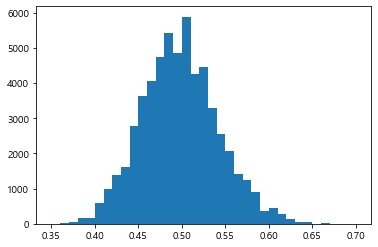

In [61]:
plt.hist(df.WHtR, range=rng, bins=bns)

## 그룹 하나에 대한 li_value, li_weight 구하기

In [48]:
bmi = dic_keys['bmi'][0]
alt = dic_keys['ALT'][0]
bmi, alt

(18.0, 10.0)

In [52]:
whtr = df[(df.bmi_c == bmi) & (df.ALT_c == alt)].WHtR

In [53]:
whtr.describe()

count    567.000000
mean       0.418808
std        0.023976
min        0.357000
25%        0.400500
50%        0.418000
75%        0.433000
max        0.524000
Name: WHtR, dtype: float64

In [64]:
y, x = np.histogram(whtr, range=rng, bins=bns)

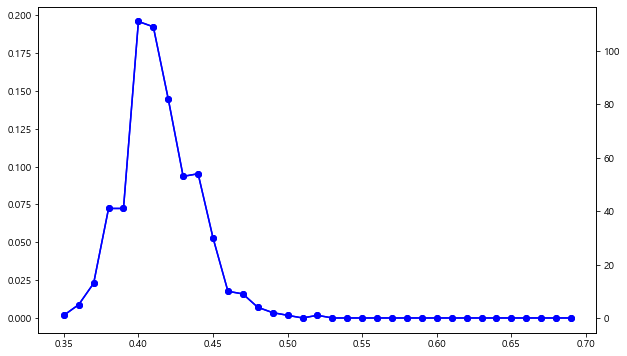

In [76]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(x[:-1], y/y.sum(), 'bo-')

ax2 = ax.twinx()
ax2.plot(x[:-1], y, 'bo-')
plt.show()

In [78]:
li_value = x[:-1]
probs = y/y.sum()

In [81]:
len(li_value), len(probs)

(35, 35)

In [82]:
probs.sum()

1.0

## 없는 그룹에 대해

In [84]:
print(dic_keys['note'])


- bmi
    - 18.0 에 대해, ALT 25.0 이상 묶기
    - 20.0 에 대해, ALT 35.0 이상 묶기
    - 30.0 에 대해, ALT 15.0 미만 묶기



In [87]:
bmi = dic_keys['bmi'][0]
alt = dic_keys['ALT'][7]
bmi, alt

(18.0, 45.0)

In [88]:
whtr = df[(df.bmi_c == bmi) & (df.ALT_c == alt)].WHtR

In [89]:
whtr.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: WHtR, dtype: float64

In [90]:
y, x = np.histogram(whtr, range=rng, bins=bns)

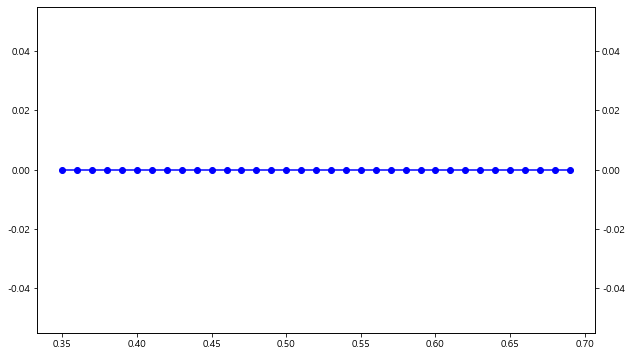

In [91]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(x[:-1], y/y.sum(), 'bo-')

ax2 = ax.twinx()
ax2.plot(x[:-1], y, 'bo-')
plt.show()

In [126]:
li_value = x[:-1]
li_weight = y/y.sum()

In [101]:
len(li_value), len(li_weight)

(35, 35)

In [102]:
li_weight.sum()

nan

In [104]:
li_value, li_weight, y, y.sum()

(array([0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
        0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
        0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
        0.68, 0.69]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 0)

- li_weight.any() == True이면 처리 건너뛰기

In [128]:
dic_keys['note2'] = 'li_weight.any() == True이면 처리 건너뛰기'
dic_keys

{'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
 'note': '\n- bmi\n    - 18.0 에 대해, ALT 25.0 이상 묶기\n    - 20.0 에 대해, ALT 35.0 이상 묶기\n    - 30.0 에 대해, ALT 15.0 미만 묶기\n',
 'note2': 'li_weight.any() == True이면 처리 건너뛰기'}

In [133]:
with open('./WHtR_concat/04/keys_02.pkl', 'rb') as fr:
    dic_keys = pickle.load(fr)
dic_keys

{'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
 'note': '\n- bmi\n    - 18.0 에 대해, ALT 25.0 이상 묶기\n    - 20.0 에 대해, ALT 35.0 이상 묶기\n    - 30.0 에 대해, ALT 15.0 미만 묶기\n',
 'note2': 'li_weight.any() == True이면 처리 건너뛰기'}

## 모든 그룹에 대해

In [136]:
df.head(2)

,WHtR,bmi_c,ALT_c
0,0.437,22.0,25.0
1,0.508,24.0,30.0


In [138]:
dic_keys['bmi'], dic_keys['ALT']

([18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0])

In [48]:
bmi = dic_keys['bmi'][0]
alt = dic_keys['ALT'][0]

(18.0, 10.0)

- 최종 저장 형태
    - {(bmi, ALT) : {'value' : li_value, 'weight' : li_weight}, ...}

In [156]:
rng, bns

((0.35, 0.7), 35)

In [145]:
dic_data = {}
for bmi in dic_keys['bmi']:
    for alt in dic_keys['ALT']:
        whtr = df[(df.bmi_c == bmi) & (df.ALT_c == alt)].WHtR
        y, x = np.histogram(whtr, range=rng, bins=bns)
        li_value = x[:-1]
        li_weight = y/y.sum()
        dic_data[(bmi, alt)] = {'value' : li_value, 'weight' : li_weight}

In [166]:
header = {'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
       'note' : '''- 대표값별 구간
    - bmi : -20/20-22/22-24/24-26/26-28/28-30/30-
    - ALT : -15/15-20/20-25/25-30/30-35/35-40/40-45/45-

- bmi   
    - 18.0 에 대해, ALT 25.0 이상 묶음    
    - 20.0 에 대해, ALT 35.0 이상 묶음   
    - 30.0 에 대해, ALT 15.0 미만 묶음 
    
- li_weight.any() == True이면 처리 건너뛰기'''}

In [167]:
print(header['note'])

- 대표값별 구간
    - bmi : -20/20-22/22-24/24-26/26-28/28-30/30-
    - ALT : -15/15-20/20-25/25-30/30-35/35-40/40-45/45-

- bmi   
    - 18.0 에 대해, ALT 25.0 이상 묶음    
    - 20.0 에 대해, ALT 35.0 이상 묶음   
    - 30.0 에 대해, ALT 15.0 미만 묶음 
    
- li_weight.any() == True이면 처리 건너뛰기


In [168]:
dic_total = {'header' : header, 'data' : dic_data}

In [169]:
dic_total

{'header': {'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
  'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
  'note': '- 대표값별 구간\n    - bmi : -20/20-22/22-24/24-26/26-28/28-30/30-\n    - ALT : -15/15-20/20-25/25-30/30-35/35-40/40-45/45-\n\n- bmi   \n    - 18.0 에 대해, ALT 25.0 이상 묶음    \n    - 20.0 에 대해, ALT 35.0 이상 묶음   \n    - 30.0 에 대해, ALT 15.0 미만 묶음 \n    \n- li_weight.any() == True이면 처리 건너뛰기'},
 'data': {(18.0,
   10.0): {'value': array([0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
          0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
          0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
          0.68, 0.69]), 'weight': array([0.00176367, 0.00881834, 0.02292769, 0.07231041, 0.07231041,
          0.1957672 , 0.19223986, 0.14462081, 0.09347443, 0.0952381 ,
          0.05291005, 0.01763668, 0.01587302, 0.00705467, 0.00352734,
          0.00176367, 0.        , 0.00176367, 0.        , 0.        ,
          0

# 검증

In [173]:
with open('./WHtR_concat/04/WHtR_weight_list.pkl', 'rb') as fr:
    data = pickle.load(fr)
data

{'header': {'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
  'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
  'note': '- 대표값별 구간\n    - bmi : -20/20-22/22-24/24-26/26-28/28-30/30-\n    - ALT : -15/15-20/20-25/25-30/30-35/35-40/40-45/45-\n\n- bmi   \n    - 18.0 에 대해, ALT 25.0 이상 묶음    \n    - 20.0 에 대해, ALT 35.0 이상 묶음   \n    - 30.0 에 대해, ALT 15.0 미만 묶음 \n    \n- li_weight.any() == True이면 처리 건너뛰기'},
 'data': {(18.0,
   10.0): {'value': array([0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45,
          0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
          0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67,
          0.68, 0.69]), 'weight': array([0.00176367, 0.00881834, 0.02292769, 0.07231041, 0.07231041,
          0.1957672 , 0.19223986, 0.14462081, 0.09347443, 0.0952381 ,
          0.05291005, 0.01763668, 0.01587302, 0.00705467, 0.00352734,
          0.00176367, 0.        , 0.00176367, 0.        , 0.        ,
          0

In [179]:
df.head(2)

,WHtR,bmi_c,ALT_c
0,0.437,22.0,25.0
1,0.508,24.0,30.0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57903 entries, 0 to 57902
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WHtR    57903 non-null  float64
 1   bmi_c   57903 non-null  float64
 2   ALT_c   57903 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


In [181]:
i = 0
bmi, alt = df.loc[i, 'bmi_c'], df.loc[i, 'ALT_c']

In [184]:
li_val = data['data'][(bmi, alt)]['value']
li_weight = data['data'][(bmi, alt)]['weight']

In [194]:
np.random.choice(li_val, p=li_weight)

0.47

In [198]:
li_whtr = []
for i in range(df.count().max()):
    bmi, alt = df.loc[i, 'bmi_c'], df.loc[i, 'ALT_c']

    li_val = data['data'][(bmi, alt)]['value']
    li_weight = data['data'][(bmi, alt)]['weight']

    li_whtr.append(np.random.choice(li_val, p=li_weight))

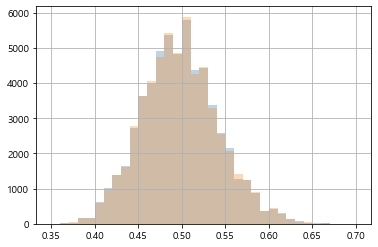

In [204]:
plt.hist(li_whtr, range=rng, bins=bns, alpha=0.3)
plt.hist(df.WHtR, range=rng, bins=bns, alpha=0.3)
plt.grid()
plt.show()

In [207]:
var = np.var(df.WHtR - li_whtr)
np.sqrt(var)

0.03659501853456612

- 평균 오차 (백분률)

In [212]:
var = np.var((df.WHtR - li_whtr)/df.WHtR)
print((np.sqrt(var)*100).round(1), '%')

7.4 %
